## Chapter 9: Plotting and Visualization

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [48]:
# Setting global parameters
plt.rc('figure', figsize=(3,3))

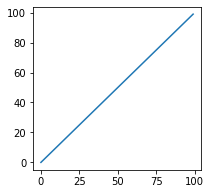

In [49]:
data = np.arange(100)

plt.plot(data)

AxesSubplot(0.125,0.125;0.227941x0.755)


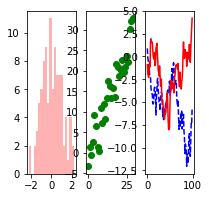

In [50]:
fig = plt.figure()
a1 = fig.add_subplot(1, 3, 1)
# print(fig)
print(a1)
a2 = fig.add_subplot(1, 3, 2)
a3 = fig.add_subplot(1, 3, 3)
# # a2 = fig.add_subplot(2, 2, 2)

plt.plot(np.random.randn(100).cumsum(), 'b--')
plt.plot(np.random.randn(100).cumsum(), 'r')
_ = a1.hist(np.random.randn(100), bins=20, color='r', alpha=0.3)
a2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30), color='g')

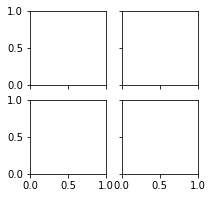

In [51]:
fig1, axes1 = plt.subplots(2, 2, sharex=True, sharey=True) # share x,y
fig1.subplots_adjust(left=None, bottom=None, right=None, # idk why this wont work
               top=None, wspace=None, hspace=None)

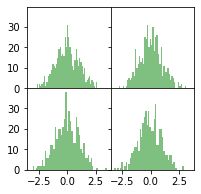

In [52]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(left=None, bottom=None, right=None,
               top=None, wspace=None, hspace=None)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes[i, j].hist(np.random.randn(500),
                        bins=50,
                        color='g',
                        alpha=0.5
                       )
        
plt.subplots_adjust(wspace=0, hspace=0)


In [53]:
# to get information on parameter
plt.figure?

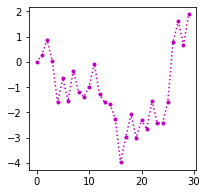

In [54]:
plt.plot(np.random.randn(30).cumsum(),
        color='m',
        linestyle=':',
        marker='.')

In [55]:
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default') # smooth
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post') # steps
plt.legend(loc='best') # add legend
plt.close()

In [56]:
plt.plot?

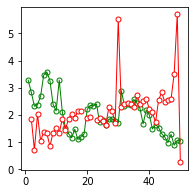

In [57]:
norm_cols = pd.read_csv("normalized_column_counts2.csv", index_col=0, header=[0,1,2,3])
plt.plot(norm_cols.index, norm_cols.iloc[:,-1],
        color='g',
        marker='o',
        linewidth=1,
        fillstyle='none',
        markersize=5)

plt.plot(norm_cols.index, norm_cols.iloc[:,1], # second line
        color='r',
        marker='o',
        markerfacecolor='w',
        markeredgewidth=1,
        linewidth=1,
        markersize=5)

(1.0, 8.0, 1.0, 8.0)

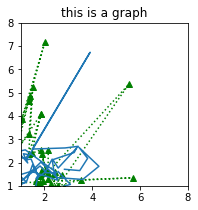

In [58]:
# with plt.plot()
x = plt.plot(norm_cols.iloc[:,1],
        norm_cols.iloc[:,2],
        ':^g',
        norm_cols.iloc[:,4],  # Can graph multiple columns like this 
        norm_cols.iloc[:,5],
        label='all') # keyword args come at the end and apply to all

plt.xlim([0,6])
plt.ylim([0,8])
# x[0] # This how to access a line on the plot
# plt.xlim # this how to access the entire plot
plt.title('this is a graph')
plt.axis([1,8,1,8])

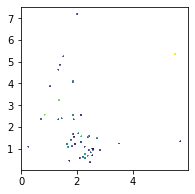

In [59]:
plt.scatter(norm_cols.iloc[:,1], # scatter plot
            norm_cols.iloc[:,2],
            norm_cols.iloc[:,5],
            norm_cols.iloc[:,6],
            '+',)

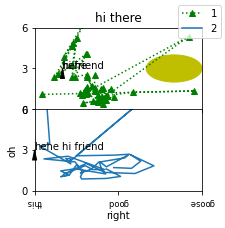

In [60]:
# with figure and axis
fig, axes = plt.subplots(2,1, sharex=True, sharey=True)
axes[0].plot(norm_cols.iloc[:,1],
        norm_cols.iloc[:,2],
        ':^g',
        label='1')
axes[1].plot(norm_cols.iloc[:,4],  # Can graph multiple columns like this 
         norm_cols.iloc[:,5],
        label = '2')

axes[0].set_title("hi there")
plt.subplots_adjust(hspace=0)
plt.xlim([0,6])
plt.ylim([0,6])

# ax1 = fig.add_subplot(1,1,1) # overright
# ax1.plot(norm_cols.iloc[:,12])
# ax1.set_xticks([1,10,20,60])

axes[1].set_xticks([0,3,6])
axes[0].set_yticks([0,3,6])

axes[1].set_xticklabels(['this',
                        'good',
                        'goose'],
                       rotation=180,
                       fontsize='small')

props = {'xlabel' : 'right', 'ylabel' : 'oh'}
axes[1].set(**props)

fig.legend()
for axis in axes:
    axis.text(1, 3, "hi friend", fontsize=10)
    axis.annotate('hehe',
                xy = (np.random.randint(6), np.random.randint(6)),
                arrowprops=dict(facecolor='black',
                               width=2,
                               headwidth=4,
                               headlength=10))
    
circle = plt.Circle((5, 3), 1, color='y')
axes[0].add_patch(circle)
resolutions = [500]
for res in resolutions:
    plt.savefig(f'haha_{res}.png',
            dpi=res,
            bbox_inches='tight',
            facecolor='b')

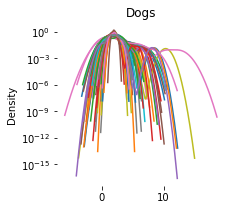

In [61]:
# Also plot from pandas

f = norm_cols.plot(
    title='Dogs',
    legend=False,
    use_index=False,
    grid=False,
#     rot=90,
    logy=True,
    kind='density',
    alpha=1,
#     subplots=True,
    sharex=True,
    sharey=True,
    ax=None,
              )
f.spines['top'].set_visible(False)
f.spines['right'].set_visible(False)
f.spines['bottom'].set_visible(False)
f.spines['left'].set_visible(False)
# f.spines['bottom'].set_visible(False)
# f.spines['left'].set_visible(False)

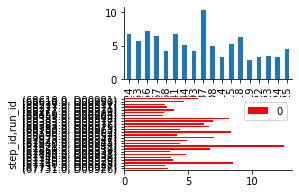

In [62]:
# Bar and barH
means = norm_cols.max()
fig, axes = plt.subplots(2, 1)
means["MB00004"].plot.bar(ax=axes[0]).set_xticklabels([x[-1] for x in means["MB00004"].index])
means["MB00005"].reset_index('reagent_id').plot.barh(ax=axes[1],
                          color='r',)#.set_xticklabels([x[-1] for x in means["MB00005"].index])
fig.subplots_adjust(hspace=0.25)

for axis in axes:
    for pos in ['right', 'top']:
        axis.spines[pos].set_visible(False)
        


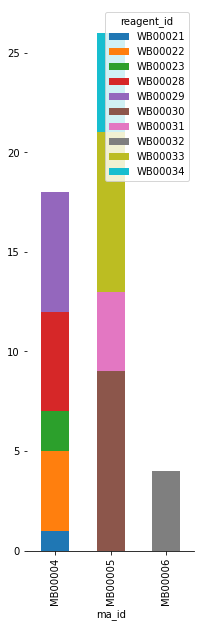

In [63]:
maxs = means.reset_index()
run_counts = pd.crosstab(maxs['reagent_id'], maxs['ma_id'])
fg = run_counts.T.plot.bar(stacked=True)

for pos in ['top', 'right', 'left']:
    fg.spines[pos].set_visible(False)
fg.figure.set_figheight(10)
    


<AxesSubplot:xlabel='max', ylabel='reagent_id'>

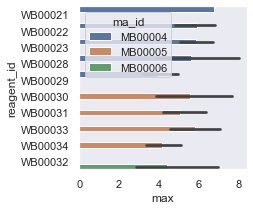

In [64]:
# Seaborn good for aggregated data
import seaborn as sns

sns.set(style='dark')
maxs.rename({0:'max'}, axis=1, inplace=True)
sns.barplot(x='max',
           y='reagent_id',
            data= maxs,
            hue='ma_id',
            width=1,)


<ipython-input-65-6b80489f9059>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(maxs['max'],)


<AxesSubplot:xlabel='max', ylabel='Density'>

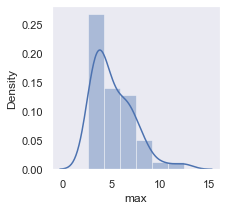

In [65]:
# Histogram
# maxs['max'].plot.hist(bins=10)
# maxs['max'].plot.density()
sns.distplot(maxs['max'],)

<ipython-input-66-e33003291377>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  for spine in plt.axes().spines:
<ipython-input-66-e33003291377>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().spines[spine].set_visible(False)


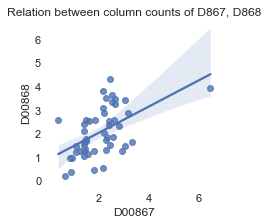

In [66]:
gr = norm_cols['MB00004', 'WB00022', '67127.0']
sns.set(style='white')
sns.regplot(data=gr,
            x='D00867',
            y='D00868')
plt.title('Relation between column counts of D867, D868')
for spine in plt.axes().spines:
    plt.axes().spines[spine].set_visible(False)

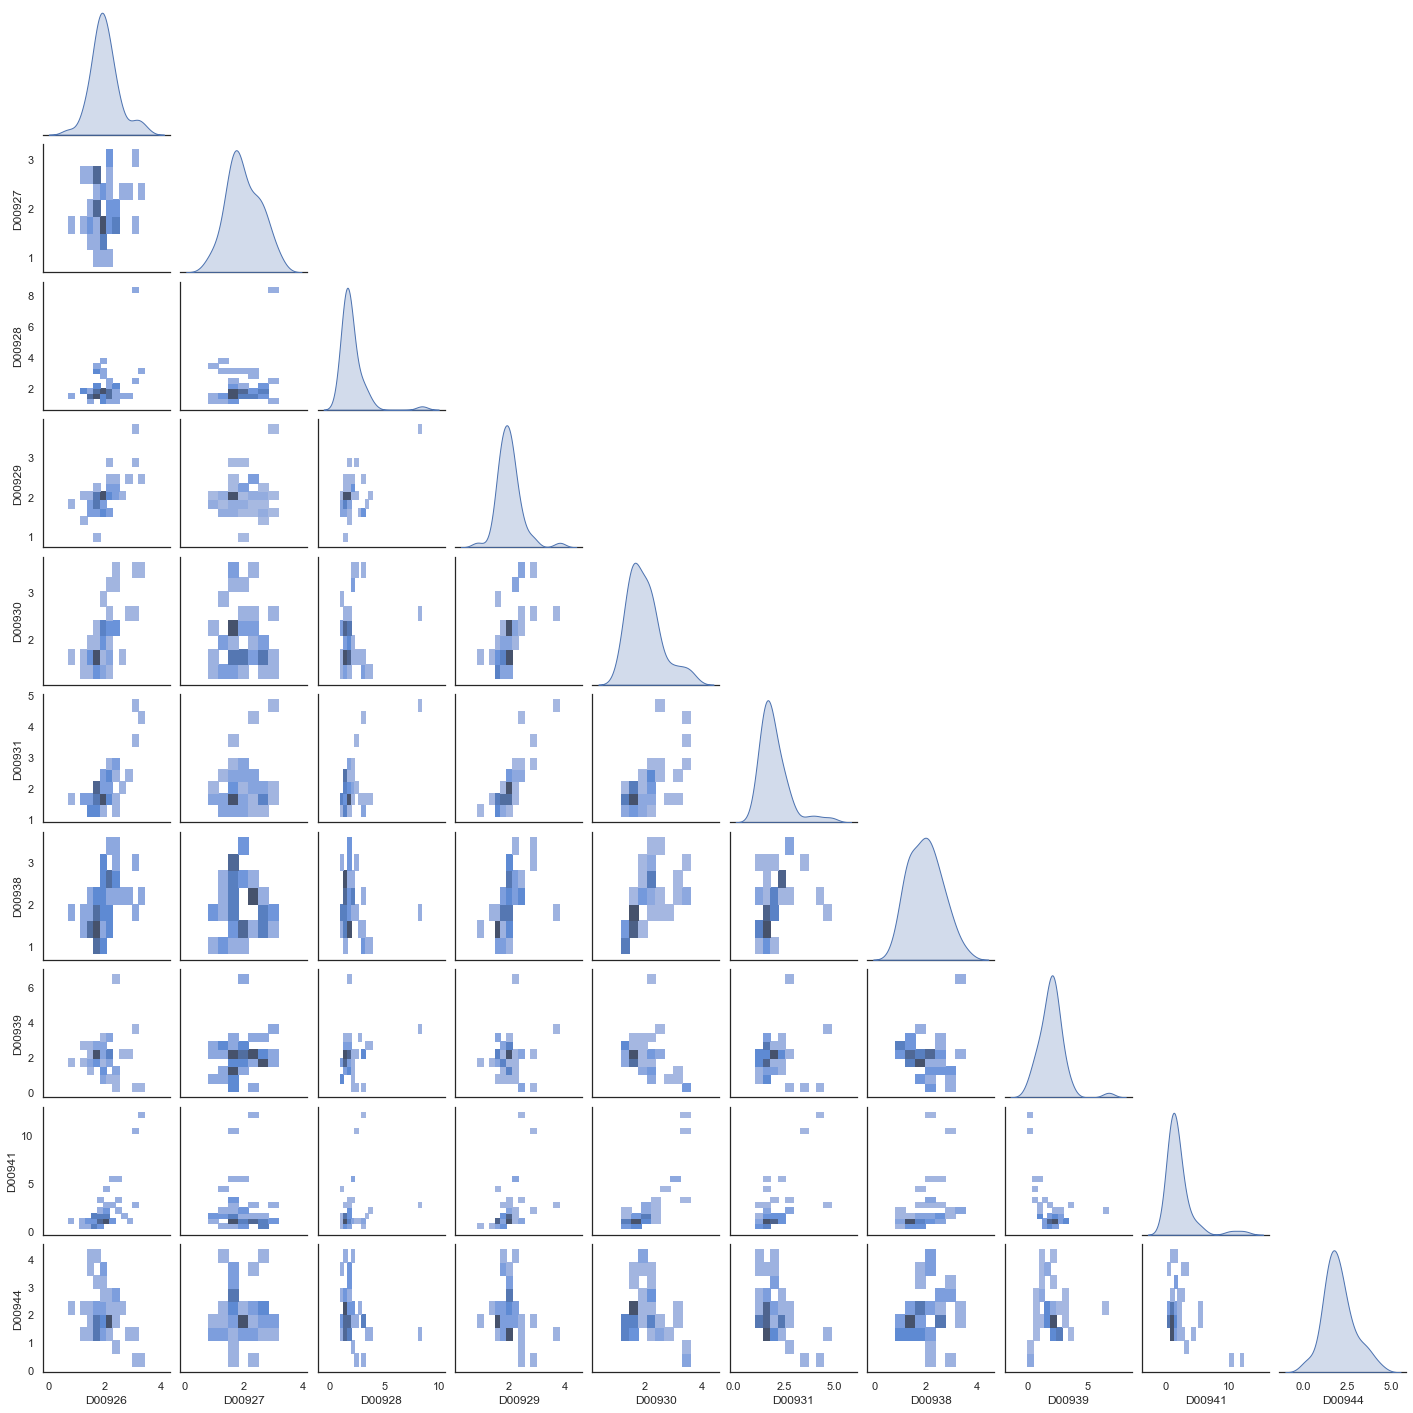

In [67]:
plt.rc('figure', figsize=(1,1))

nc2 = norm_cols['MB00005'].droplevel([0,1], axis=1).iloc[:,:10]
sns.pairplot(nc2,
            kind='hist',
            diag_kind='kde',
            corner=True,
            height=2,
            )

/Users/jamesm/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


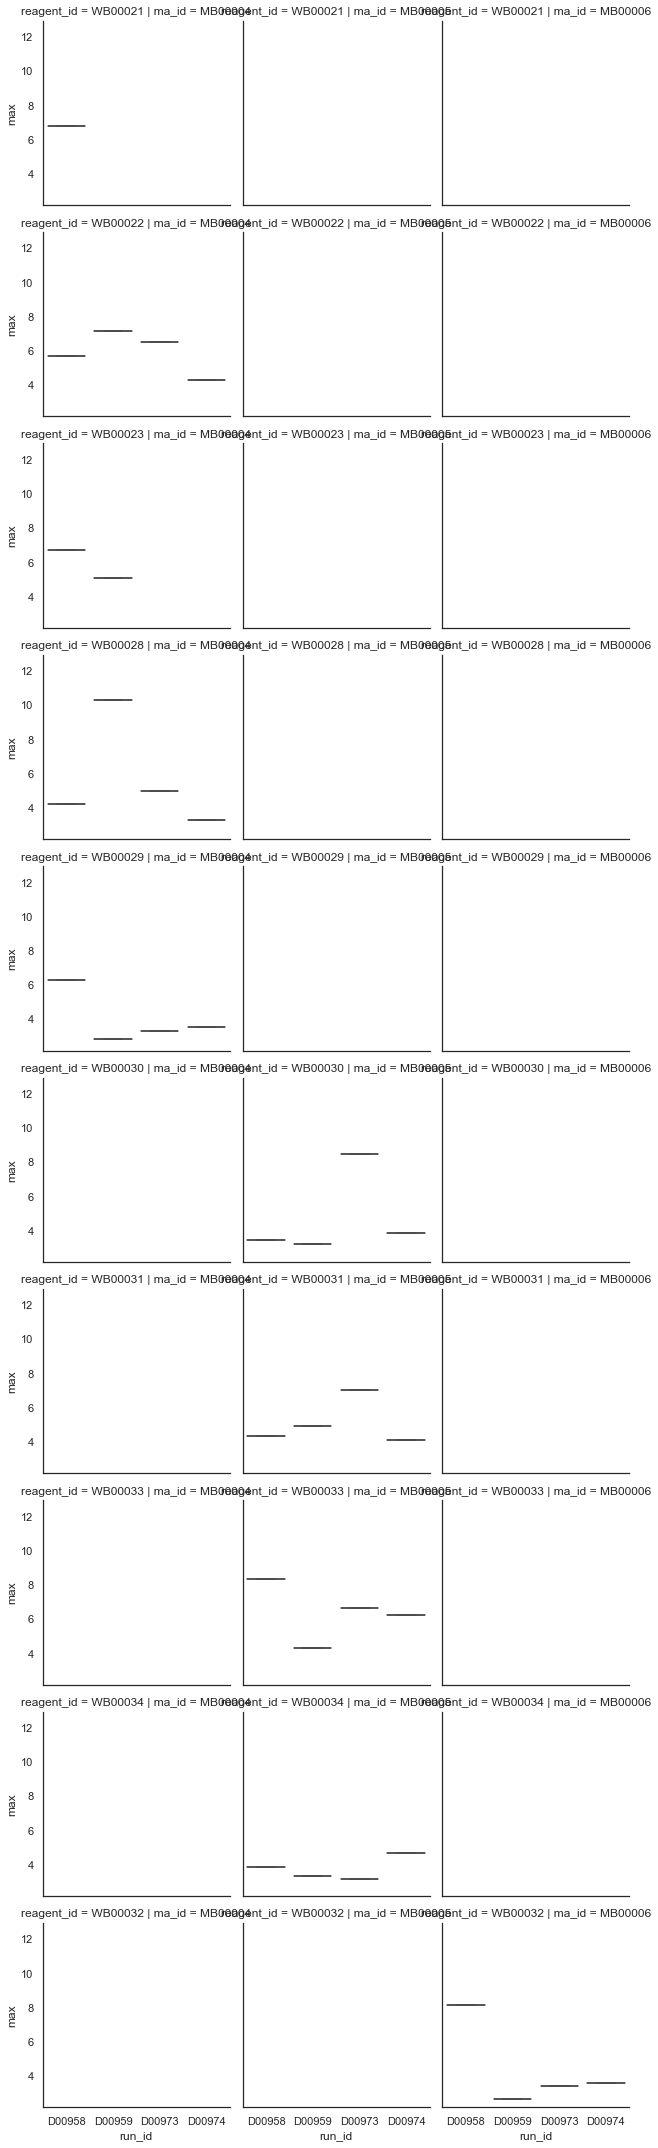

In [92]:
g = sns.FacetGrid(data=maxs,
              col='ma_id',
              row='reagent_id',
              dropna=True,
                 )

g.map(sns.boxplot, 'run_id', "max")

From Chapter 8: Data Wrangling

In [69]:
test = pd.DataFrame(np.arange(10).reshape(2, 5))
print(test)
# Columns have to map to original columns
test2 = pd.DataFrame(test, columns=list('ABCDE')) 
print(test2)
test3 = pd.DataFrame(test, columns=[0,1,2,3,4])
print(test3)
print(test3.set_index(3)) # set index


   0  1  2  3  4
0  0  1  2  3  4
1  5  6  7  8  9
    A   B   C   D   E
0 NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN
   0  1  2  3  4
0  0  1  2  3  4
1  5  6  7  8  9
   0  1  2  4
3            
3  0  1  2  4
8  5  6  7  9


In [70]:
test4 = pd.DataFrame(np.arange(20).reshape(4,5), columns=[
                                                        ['I', 'I', 'I', 'I', 'J'],
                                                        ['G', 'G', 'F', 'F', 'H'], 
                                                        list('ABCDE') #Inner-most
                                                         ])
print(test4)
print(test4.columns)
# You can reuse columsn
pd.DataFrame(np.arange(20).reshape(4,5),
             columns=test4.columns)


    I               J
    G       F       H
    A   B   C   D   E
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19
MultiIndex([('I', 'G', 'A'),
            ('I', 'G', 'B'),
            ('I', 'F', 'C'),
            ('I', 'F', 'D'),
            ('J', 'H', 'E')],
           )


I               J
    G       F       H
    A   B   C   D   E
0   0   1   2   3   4
1   5   6   7   8   9
2  10  11  12  13  14
3  15  16  17  18  19